## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline
%reload_ext nb_black

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [2]:
reviews = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv"
)

<IPython.core.display.Javascript object>

In [3]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<IPython.core.display.Javascript object>

We will predict app ratings using other features describing the app. To use these features, we must clean the data.

To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [4]:
# answer below:
reviews = reviews.drop(
    columns=[
        "App",
        "Category",
        "Size",
        "Installs",
        "Genres",
        "Last Updated",
        "Current Ver",
        "Android Ver",
    ]
)

<IPython.core.display.Javascript object>

In [5]:
reviews.head()

,Rating,Reviews,Type,Price,Content Rating
0,4.1,159,Free,0,Everyone
1,3.9,967,Free,0,Everyone
2,4.7,87510,Free,0,Everyone
3,4.5,215644,Free,0,Teen
4,4.3,967,Free,0,Everyone


<IPython.core.display.Javascript object>

Check for missing values and remove all rows containing missing values

In [6]:
# answer below:
reviews.isna().mean()

Rating            0.135965
Reviews           0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
dtype: float64

<IPython.core.display.Javascript object>

In [7]:
reviews.shape

(10841, 5)

<IPython.core.display.Javascript object>

In [8]:
reviews = reviews.dropna()
reviews.shape

(9366, 5)

<IPython.core.display.Javascript object>

In [9]:
reviews

,Rating,Reviews,Type,Price,Content Rating
0,4.1,159,Free,0,Everyone
1,3.9,967,Free,0,Everyone
2,4.7,87510,Free,0,Everyone
3,4.5,215644,Free,0,Teen
4,4.3,967,Free,0,Everyone
...,...,...,...,...,...
10834,4.0,7,Free,0,Everyone
10836,4.5,38,Free,0,Everyone
10837,5.0,4,Free,0,Everyone
10839,4.5,114,Free,0,Mature 17+


<IPython.core.display.Javascript object>

In [10]:
reviews["Price"] = reviews["Price"].str.strip("$")
reviews["Price"] = pd.to_numeric(reviews["Price"])

<IPython.core.display.Javascript object>

In [11]:
reviews["Reviews"] = pd.to_numeric(reviews["Reviews"])

<IPython.core.display.Javascript object>

Remove outliers from the Type and Content Rating columns (very rare values that won't train well).

In [12]:
# answer below:
reviews["Type"].unique()

array(['Free', 'Paid'], dtype=object)

<IPython.core.display.Javascript object>

In [13]:
reviews["Type"].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# Not enough information in 'Adults only 18+' and 'Unrated'
reviews["Content Rating"].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
reviews = reviews[~reviews["Content Rating"].isin(["Adults only 18+", "Unrated"])]

<IPython.core.display.Javascript object>

Convert the Type and Content Rating columns to a numeric format, whether by one-hot encoding, ordinal encoding, or similar.

In [16]:
reviews = pd.concat([reviews, pd.get_dummies(reviews.Type)], axis=1)
reviews.head()

,Rating,Reviews,Type,Price,Content Rating,Free,Paid
0,4.1,159,Free,0.0,Everyone,1,0
1,3.9,967,Free,0.0,Everyone,1,0
2,4.7,87510,Free,0.0,Everyone,1,0
3,4.5,215644,Free,0.0,Teen,1,0
4,4.3,967,Free,0.0,Everyone,1,0


<IPython.core.display.Javascript object>

In [17]:
reviews = pd.concat([reviews, pd.get_dummies(reviews["Content Rating"])], axis=1)
reviews.head()

,Rating,Reviews,Type,Price,Content Rating,Free,Paid,Everyone,Everyone 10+,Mature 17+,Teen
0,4.1,159,Free,0.0,Everyone,1,0,1,0,0,0
1,3.9,967,Free,0.0,Everyone,1,0,1,0,0,0
2,4.7,87510,Free,0.0,Everyone,1,0,1,0,0,0
3,4.5,215644,Free,0.0,Teen,1,0,0,0,0,1
4,4.3,967,Free,0.0,Everyone,1,0,1,0,0,0


<IPython.core.display.Javascript object>

Finally, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [18]:
reviews = reviews.drop(columns=(["Type", "Content Rating"]))

<IPython.core.display.Javascript object>

In [19]:
# answer below:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        9362 non-null   float64
 1   Reviews       9362 non-null   int64  
 2   Price         9362 non-null   float64
 3   Free          9362 non-null   uint8  
 4   Paid          9362 non-null   uint8  
 5   Everyone      9362 non-null   uint8  
 6   Everyone 10+  9362 non-null   uint8  
 7   Mature 17+    9362 non-null   uint8  
 8   Teen          9362 non-null   uint8  
dtypes: float64(2), int64(1), uint8(6)
memory usage: 347.4 KB


<IPython.core.display.Javascript object>

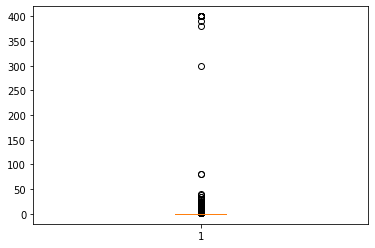

<IPython.core.display.Javascript object>

In [20]:
plt.boxplot(reviews["Price"])
plt.show()

In [21]:
reviews["Price"] = reviews[reviews["Price"] < 50]

<IPython.core.display.Javascript object>

Perform a train test split with 20% of the data in the test sample.

In [22]:
# answer below:
X = reviews.drop(columns="Rating")
y = reviews["Rating"]

<IPython.core.display.Javascript object>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=55
)

<IPython.core.display.Javascript object>

Now generate a linear model using statsmodels and produce a p value for each coefficient in the model. Analyze the results. (Look at the results table and at a homoscedasticity plot.)

In [28]:
# answer below:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_const).fit()
model.summary()

MissingDataError: exog contains inf or nans

<IPython.core.display.Javascript object>

Scale your predictors and refit the linear model.

* How does this change the coefficients?
* How does this change the coefficients' p values?
* How does this change model performance?

In [ ]:
# answer below:
